In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (12, 8)

## Fonction à deviner

In [4]:
def cible(x):
    return 2*x-0.5


## Echantillonnage et bruit gaussien

In [5]:
points = np.random.random(size=(20))
valeurs = cible(points)
observations = valeurs + 0.1*np.random.randn(20)

## Visualisation

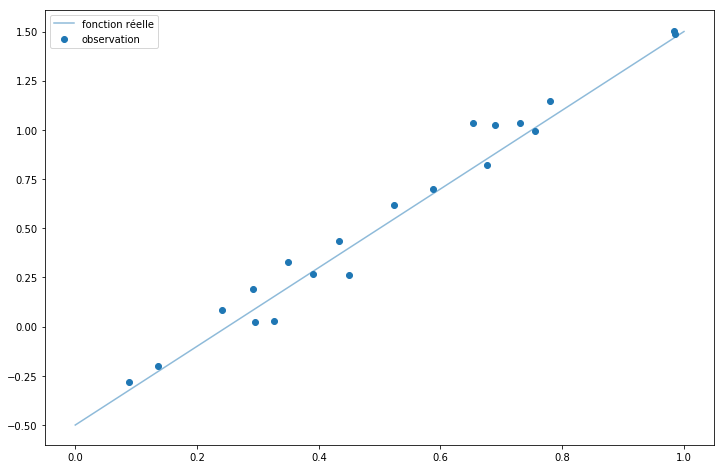

In [8]:
plt.scatter(points, observations, label="observation")
x = np.linspace(0, 1, 100)
y = cible(x)
plt.plot(x,y,alpha=0.5, label="fonction réelle")
plt.legend();

## Modele constant

on cherche la meilleure fonction constante $x\mapsto b$

In [9]:
def erreur_q(b):
    return sum((observations-b)**2)/len(observations)

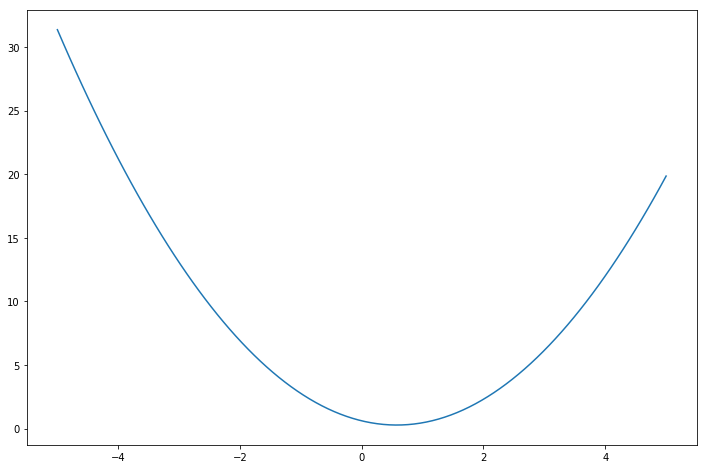

In [11]:
bs = np.linspace(-5, 5, 100)
ers = [erreur_q(b) for b in bs]
plt.plot(bs ,ers)

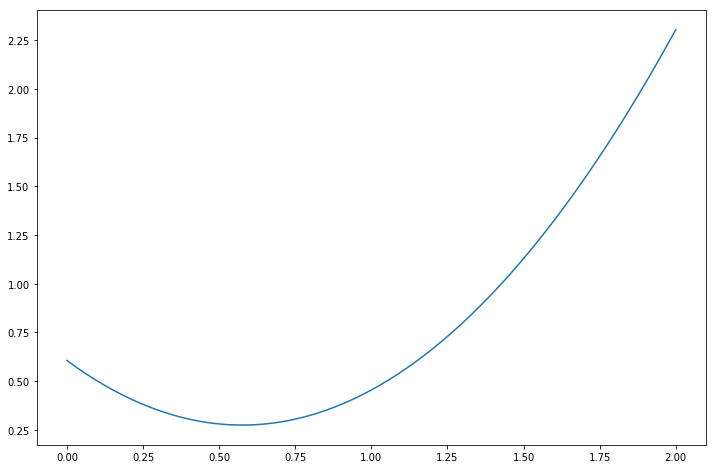

In [12]:
bs = np.linspace(0, 2, 100)
ers = [erreur_q(b) for b in bs]
plt.plot(bs ,ers)

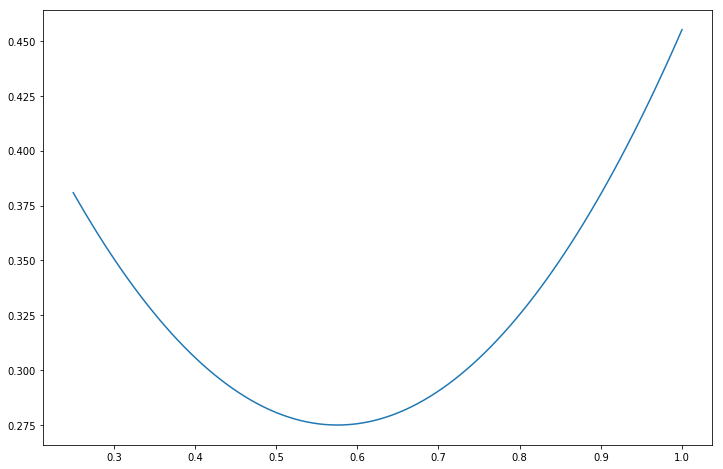

In [13]:
bs = np.linspace(0.25, 1, 100)
ers = [erreur_q(b) for b in bs]
plt.plot(bs ,ers)

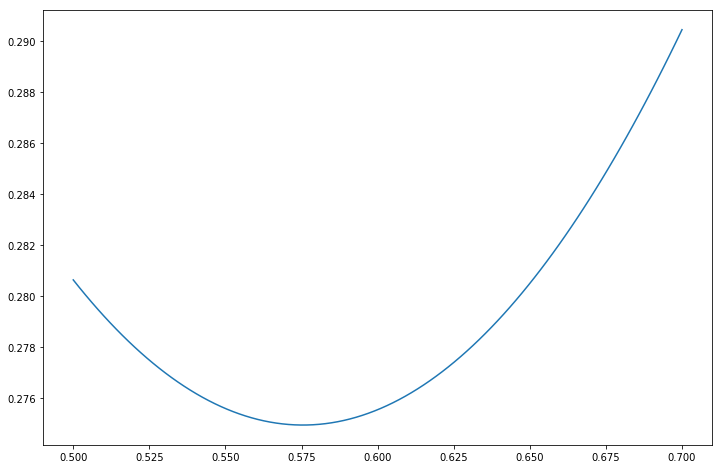

In [14]:
bs = np.linspace(0.5, 0.7, 100)
ers = [erreur_q(b) for b in bs]
plt.plot(bs ,ers)

In [15]:
np.mean(observations)

0.5754602299020963

## Le minimum de l'erreur quadratique pour les constantes est la moyenne, l'erreur quadratique est alors la variance

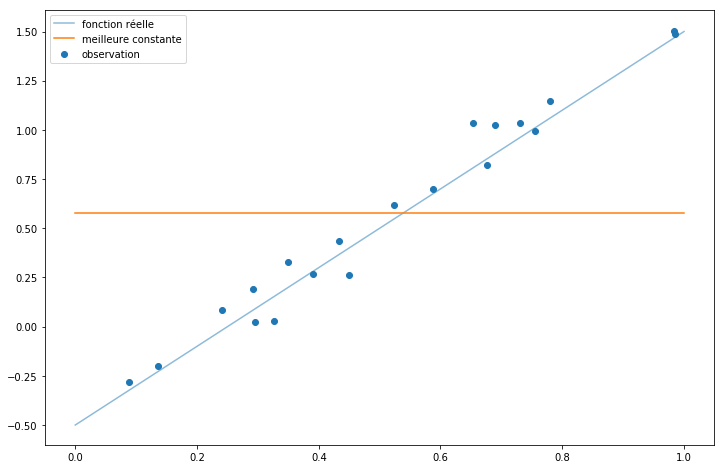

In [16]:
plt.scatter(points, observations, label="observation")
x = np.linspace(0, 1, 100)
y = cible(x)
plt.plot(x,y,alpha=0.5, label="fonction réelle")
plt.plot([0,1], [np.mean(observations)]*2, label="meilleure constante")
plt.legend();

## Modele linéaire
on cherche à minimiser l'erreur quadratique pour les fonctions $x\mapsto ax+b$

In [17]:
def erreur_q(a,b):
    return sum((observations-a*points-b)**2)/len(observations)

Wall time: 6.86 s


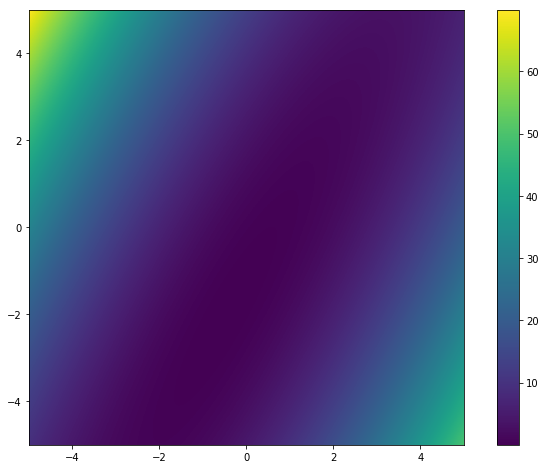

In [36]:
%%time
a_s = np.linspace(-5, 5, 1000)
b_s = np.linspace(-5, 5, 1000)
ers = [[erreur_q(a,b) for b in b_s] for a in a_s]
plt.imshow(ers, extent=[-5, 5, -5, 5])
plt.colorbar();

In [31]:
ers = np.array(ers)

In [32]:
ers.argmin()

28090

In [33]:
ind = ers.argmin()
c_a, c_b = ind//200, ind%200
print(c_a, c_b)

140 90


In [34]:
a, b = a_s[c_a],b_s[c_b]
print(a,b)

2.035175879396985 -0.47738693467336635


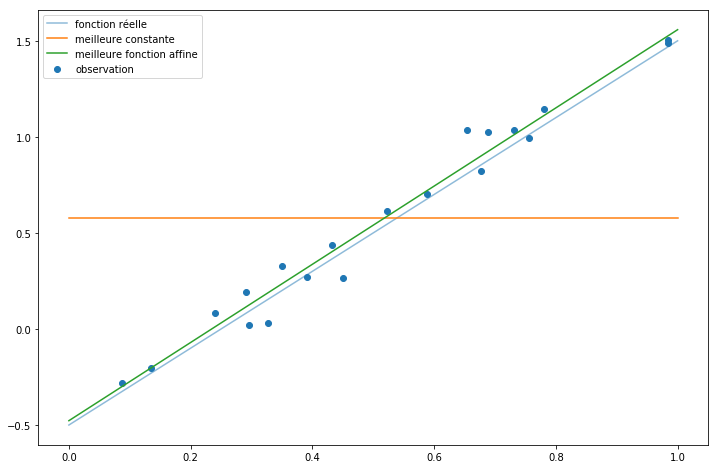

In [35]:
plt.scatter(points, observations, label="observation")
x = np.linspace(0, 1, 100)
y = cible(x)
plt.plot(x,y,alpha=0.5, label="fonction réelle")
plt.plot([0,1], [np.mean(observations)]*2, label="meilleure constante")
plt.plot(x, a*x+b, label="meilleure fonction affine")
plt.legend();

## Ici améliorer la précision d'un facteur 2 multiplie le temps de calculs par 4. Pour un modèle à 3 paramètres on augmenterait le temps de calcul de 8 etc...

## Question : adapter la méthode précédente pour le modèle quadratique

$x\mapsto ax^2+bx+c$

In [55]:
def quad(discr):
    def erreur_q(a,b,c):
        return sum((observations-a*points**2-b*points-c)**2)/len(observations)
    
    a_s, b_s, c_s = np.linspace(-5, 5, discr), np.linspace(-5, 5, discr), np.linspace(-5, 5, discr)
    ers = [[[erreur_q(a,b,c) for c in c_s] for b in b_s] for a in a_s]
    ers = np.array(ers)
    ia,ib,ic = np.unravel_index(ers.argmin(), dims=(discr, discr, discr))
    return a_s[ia], b_s[ib], c_s[ic]

In [56]:
quad(10)

(0.5555555555555554, 1.666666666666667, -0.5555555555555554)

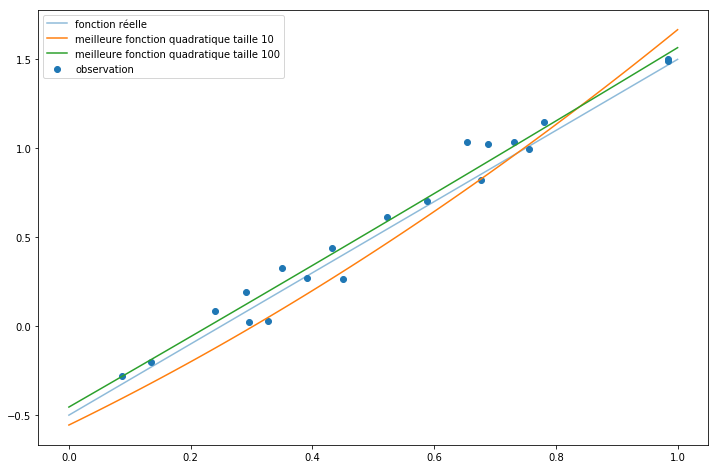

In [57]:
plt.scatter(points, observations, label="observation")
x = np.linspace(0, 1, 100)
y = cible(x)
plt.plot(x,y,alpha=0.5, label="fonction réelle")
a,b,c = quad(10)
plt.plot(x, a*x**2+b*x+c, label="meilleure fonction quadratique taille 10")
a,b,c = quad(100)
plt.plot(x, a*x**2+b*x+c, label="meilleure fonction quadratique taille 100")

plt.legend();

In [58]:
%time quad(10)

Wall time: 15.4 ms


(0.5555555555555554, 1.666666666666667, -0.5555555555555554)

In [59]:
%time quad(20)

Wall time: 93.5 ms


(-1.3157894736842106, 3.421052631578947, -0.7894736842105265)

In [60]:
%time quad(40)

Wall time: 588 ms


(0.38461538461538414, 1.666666666666666, -0.384615384615385)

In [61]:
%time quad(80)

Wall time: 4.53 s


(0.1898734177215191, 1.8354430379746844, -0.443037974683544)

In [62]:
%time quad(160)

Wall time: 36 s


(-0.031446540880502916, 2.0440251572327046, -0.4716981132075473)

## Utilisation de méthode de gradients

In [63]:
import scipy.optimize as so

In [64]:
def quad_bis():
    def erreur_q(X):
        a,b,c = X
        return sum((observations-a*points**2-b*points-c)**2)/len(observations)
    
    resultat = so.minimize(fun=erreur_q, x0=(0,0,0))
    return resultat.x

In [65]:
a,b,c = quad_bis()


array([-0.03951616,  2.08328288, -0.49104561])

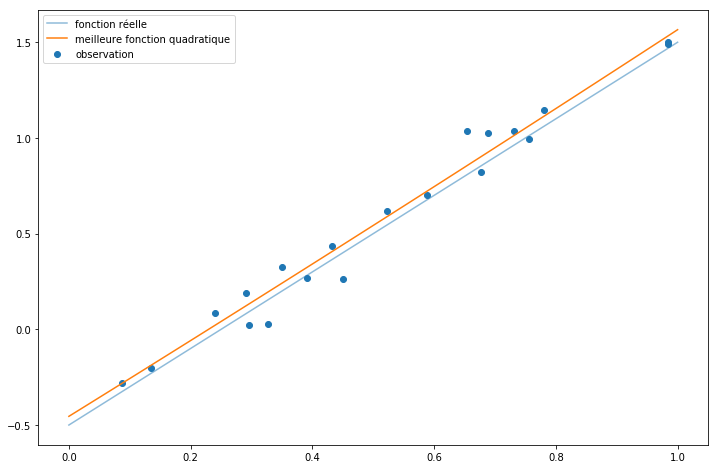

In [66]:
plt.scatter(points, observations, label="observation")
x = np.linspace(0, 1, 100)
y = cible(x)
plt.plot(x,y,alpha=0.5, label="fonction réelle")
plt.plot(x, a*x**2+b*x+c, label="meilleure fonction quadratique")

plt.legend();

## Adapter le code précédent pour les fonctions cubiques de puissance 4 etc...

In [67]:
def cube():
    def erreur_q(X):
        a,b,c,d = X
        return sum((observations-a*points**3-b*points**2-c*points-d)**2)/len(observations)
    
    resultat = so.minimize(fun=erreur_q, x0=(0,0,0,0))
    return resultat.x

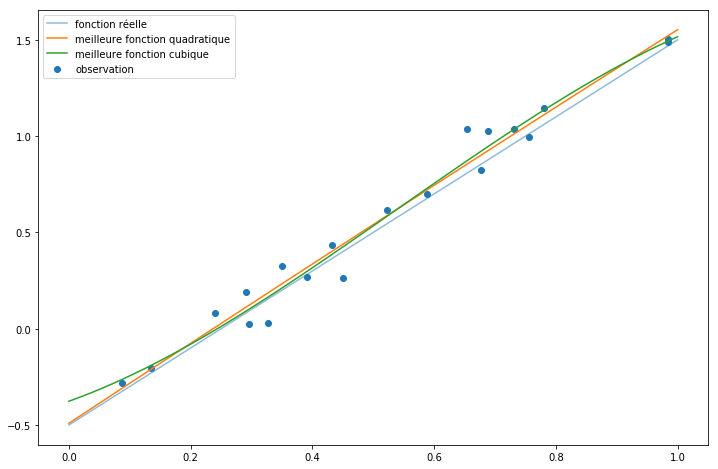

In [68]:
plt.scatter(points, observations, label="observation")
x = np.linspace(0, 1, 100)
y = cible(x)
plt.plot(x,y,alpha=0.5, label="fonction réelle")
a,b,c = quad_bis()
plt.plot(x, a*x**2+b*x+c, label="meilleure fonction quadratique")
a,b,c,d = cube()
plt.plot(x, a*x**3+b*x**2+c*x+d, label="meilleure fonction cubique")

plt.legend();

In [70]:
def modele(n):
    def erreur_q(X):
        predictions = sum(a*points**(n-d) for d,a in enumerate(X))
        return sum((observations-predictions)**2)/len(observations)
    
    resultat = so.minimize(fun=erreur_q, x0=np.zeros(n+1))
    return resultat.x

In [69]:
liste = ["a","b","c"]
for i,c in enumerate(liste):
    print(i,c)

0 a
1 b
2 c


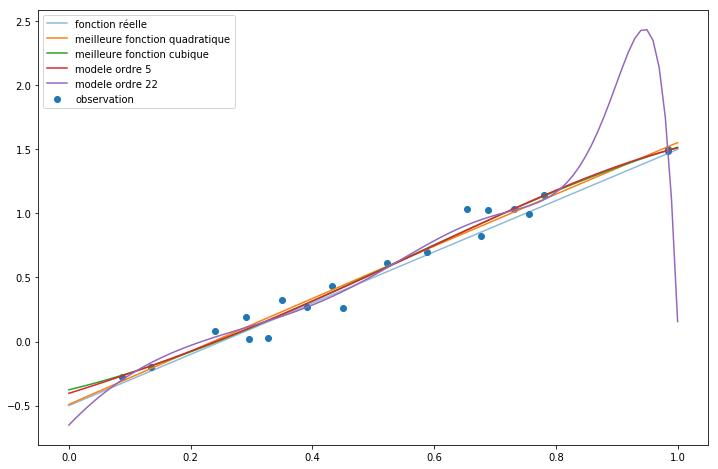

In [77]:
plt.scatter(points, observations, label="observation")
x = np.linspace(0, 1, 100)
y = cible(x)
plt.plot(x,y,alpha=0.5, label="fonction réelle")
a,b,c = quad_bis()
plt.plot(x, a*x**2+b*x+c, label="meilleure fonction quadratique")
a,b,c,d = cube()
plt.plot(x, a*x**3+b*x**2+c*x+d, label="meilleure fonction cubique")

coeffs = modele(5)
predictions = sum(a*x**(5-d) for d,a in enumerate(coeffs))
plt.plot(x, predictions, label="modele ordre 5")

deg = 22
coeffs = modele(deg)
predictions = sum(a*x**(deg-d) for d,a in enumerate(coeffs))
plt.plot(x, predictions, label="modele ordre "+str(deg))

plt.legend();

# Conclusion
Il est crucial de conserver une partie des échantillons pour valider le modèle a posteriori afin d'éviter le phénomène d'overfitting.